# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

<img src = "https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Importing the necessary libraries

In [1559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline


import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics 

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

# Step 1: Reading and Understanding data

In [1560]:
df = pd.read_csv('Leads.csv')

In [1561]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1562]:
df.shape

(9240, 37)

In [1563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1564]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [1565]:
# creating a copy of the original dataframe
df1 = df.copy()
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


# Step 2 : Data Cleaning

In [1566]:
# Finding columns with unique values that can be dropped
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- We can drop `Prospect ID`, `Lead Number` as these have unique values and are of no use for the ananlysis

In [1567]:
df.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [1568]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

### Checking Missing Values

In [1569]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [1570]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)


Lead Quality                                    0.52
Asymmetrique Activity Index                     0.46
Asymmetrique Profile Score                      0.46
Asymmetrique Profile Index                      0.46
Asymmetrique Activity Score                     0.46
Tags                                            0.36
Lead Profile                                    0.29
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
How did you hear about X Education              0.24
Specialization                                  0.16
City                                            0.15
Page Views Per Visit                            0.01
TotalVisits                                     0.01
Last Activity                                   0.01
Lead Source                                     0.00
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview        

#### Dropping features with more than 40% missing values

In [1571]:
null = (df.isnull().sum()/len(df)).sort_values(ascending=False)
null

Lead Quality                                    0.52
Asymmetrique Activity Index                     0.46
Asymmetrique Profile Score                      0.46
Asymmetrique Profile Index                      0.46
Asymmetrique Activity Score                     0.46
Tags                                            0.36
Lead Profile                                    0.29
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
How did you hear about X Education              0.24
Specialization                                  0.16
City                                            0.15
Page Views Per Visit                            0.01
TotalVisits                                     0.01
Last Activity                                   0.01
Lead Source                                     0.00
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview        

In [1572]:
df.drop(null[null > 0.4].index, axis=1, inplace = True)

In [1573]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Tags                                            0.36
Lead Profile                                    0.29
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
How did you hear about X Education              0.24
Specialization                                  0.16
City                                            0.15
TotalVisits                                     0.01
Page Views Per Visit                            0.01
Last Activity                                   0.01
Lead Source                                     0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Lead Origin                                     0.00
Through Recommendations                         0.00
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview          0.00
Receive More Updates About Our Courses        

In [1574]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


#### Checking the value count of all the categorical columns

In [1575]:
categ_cols = df.select_dtypes(include=object)

for i in categ_cols:
    print(i)
    print()
    print(df[i].value_counts())
    print("--------------------------------")

Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------
Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
--------------------------------
Do Not Email

No     8506
Yes     734
Name: Do Not Email, dtype: int64
--------------------------------
Do Not Call

No     9238
Yes      

#### Replacing the features having `Select` values with NULL Values for further processing

In [1576]:
df = df.replace("Select", np.nan)

#### Checking the Missing values again

In [1577]:
df.isnull().sum().sort_values(ascending=False)/len(df)

How did you hear about X Education              0.78
Lead Profile                                    0.74
City                                            0.40
Specialization                                  0.37
Tags                                            0.36
What matters most to you in choosing a course   0.29
What is your current occupation                 0.29
Country                                         0.27
TotalVisits                                     0.01
Page Views Per Visit                            0.01
Last Activity                                   0.01
Lead Source                                     0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Lead Origin                                     0.00
Through Recommendations                         0.00
I agree to pay the amount through cheque        0.00
A free copy of Mastering The Interview          0.00
Receive More Updates About Our Courses        

#### The features `How did you hear about X Education`, `Lead Profile` have a large number of missing values. 
#### So we need drop these features as it will affect our analysis.

- We will not not drop `City`, `Specialization`, and `Tags` as these features are important for the problem

In [1578]:
df.drop(["How did you hear about X Education", "Lead Profile"], axis=1, inplace=True)

#### Dropping missing rows from `TotalVisits`, `Page Views Per Visit`, `Last Activity`  because they have very few missing values       

In [1579]:
rows = ["TotalVisits", "Page Views Per Visit", "Last Activity", "Lead Source"]

In [1580]:
df.dropna(subset=rows, axis=0, inplace=True)

#### Checking the Missing values again

In [1581]:
df.isnull().sum().sort_values(ascending=False)/len(df)

City                                            0.39
Tags                                            0.37
Specialization                                  0.36
What matters most to you in choosing a course   0.30
What is your current occupation                 0.30
Country                                         0.25
Lead Origin                                     0.00
X Education Forums                              0.00
A free copy of Mastering The Interview          0.00
I agree to pay the amount through cheque        0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Receive More Updates About Our Courses          0.00
Through Recommendations                         0.00
Digital Advertisement                           0.00
Newspaper                                       0.00
Magazine                                        0.00
Newspaper Article                               0.00
Lead Source                                   

In [1582]:
df['Country'].value_counts()/df.shape[0]*100

India                  71.53
United States           0.76
United Arab Emirates    0.58
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.17
Australia               0.14
Qatar                   0.11
Hong Kong               0.08
Bahrain                 0.08
Oman                    0.07
France                  0.07
unknown                 0.06
South Africa            0.04
Nigeria                 0.04
Germany                 0.04
Kuwait                  0.04
Canada                  0.04
Sweden                  0.03
China                   0.02
Asia/Pacific Region     0.02
Uganda                  0.02
Bangladesh              0.02
Italy                   0.02
Belgium                 0.02
Netherlands             0.02
Ghana                   0.02
Philippines             0.02
Russia                  0.01
Switzerland             0.01
Vietnam                 0.01
Denmark                 0.01
Tanzania                0.01
Liberia                 0.01
Malaysia      

In [1583]:
df[df['Country']=='India'].City.value_counts()


Mumbai                         2917
Thane & Outskirts               651
Other Cities                    564
Other Cities of Maharashtra     391
Other Metro Cities              345
Tier II Cities                   69
Name: City, dtype: int64

In [1584]:
df[df['Country']!='India'].City.value_counts()

Mumbai                         260
Other Cities                   116
Thane & Outskirts               94
Other Cities of Maharashtra     55
Other Metro Cities              32
Tier II Cities                   5
Name: City, dtype: int64

-Since  `Country` and `City` of customer looks abnormal as Indian city cannot be name of other country. Hence we will drop this as non of this have much impact on conversion rate.

In [1585]:
df.drop(['Country','City'],axis=1, inplace=True)

In [1586]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Tags                                            0.37
Specialization                                  0.36
What matters most to you in choosing a course   0.30
What is your current occupation                 0.30
Lead Origin                                     0.00
X Education Forums                              0.00
A free copy of Mastering The Interview          0.00
I agree to pay the amount through cheque        0.00
Get updates on DM Content                       0.00
Update me on Supply Chain Content               0.00
Receive More Updates About Our Courses          0.00
Through Recommendations                         0.00
Digital Advertisement                           0.00
Newspaper                                       0.00
Magazine                                        0.00
Newspaper Article                               0.00
Lead Source                                     0.00
Search                                          0.00
Last Activity                                 

In [1587]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1588]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

- `Last Activity` and `Last Notable Activity` have similar values. 
- We will drop one of the features out of them. We will drop that feature which will have less unique values.

In [1589]:
df['Last Activity'].nunique()

17

In [1590]:
df['Last Notable Activity'].nunique()

16

- We will drop `Last Notable Activity`

In [1591]:
df.drop("Last Notable Activity", axis=1, inplace=True)

In [1592]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,...,No,No,No,No,No,Interested in other courses,No,No,No,No
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,NaN,...,No,No,No,No,No,Ringing,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,...,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,...,No,No,No,No,No,Ringing,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,NaN,...,No,No,No,No,No,Will revert after reading the email,No,No,No,No


#### Imputing Missing Values

#### Checking distribution of `What is your current occupation` feature

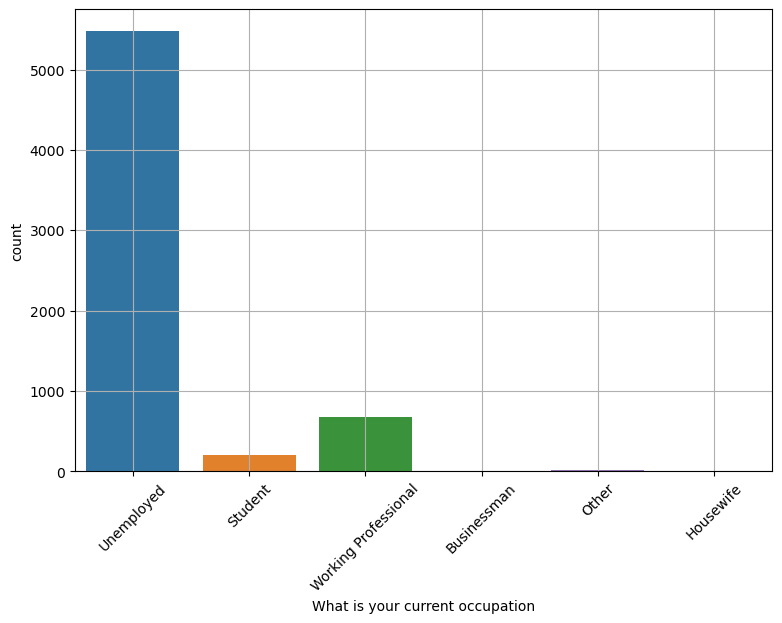

In [1593]:
plt.figure(figsize = (9,6))
sns.countplot(x=df["What is your current occupation"])
plt.xticks(rotation = 45)
plt.grid(zorder=1)
plt.show()

* `What is your current occupation` is having missing values but it is an important feature. So we will not drop it. We will impute it with the highest occuring values

* Imputing missing values in `What is your current occupation` with the highest occuring value in the columns 

In [1594]:
df["What is your current occupation"] = df["What is your current occupation"].fillna(
                                        df["What is your current occupation"].mode()[0])

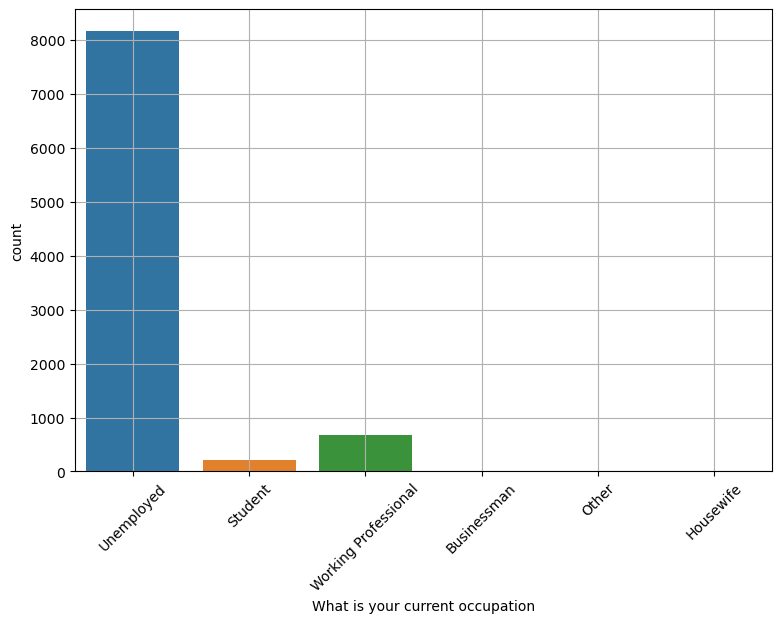

In [1595]:
plt.figure(figsize = (9,6))
sns.countplot(x=df["What is your current occupation"])
plt.xticks(rotation = 45)
plt.grid(zorder=1)
plt.show()

#### Checking Missing Values again

In [1596]:
df.isnull().sum().sort_values(ascending = False)

Tags                                             3327
Specialization                                   3282
What matters most to you in choosing a course    2702
Lead Origin                                         0
Newspaper Article                                   0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Search                                              0
Magazine                                            0
Lead Source                                         0
What is your current occupation                     0
Last Activity                                       0
Page Views Per Visit        

#### Checking the distrubution of `Specialization` feature

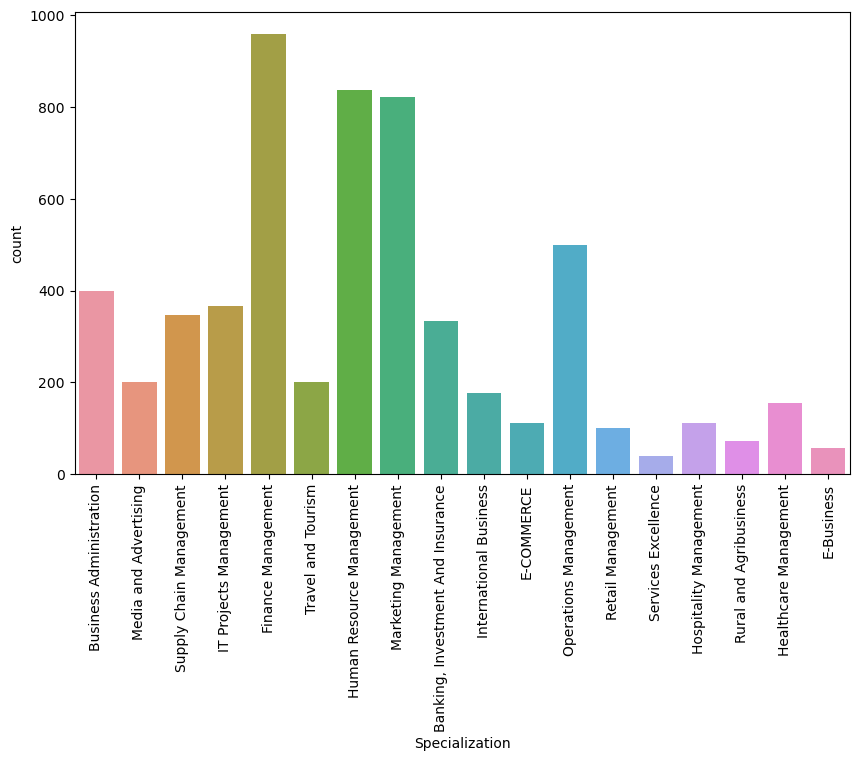

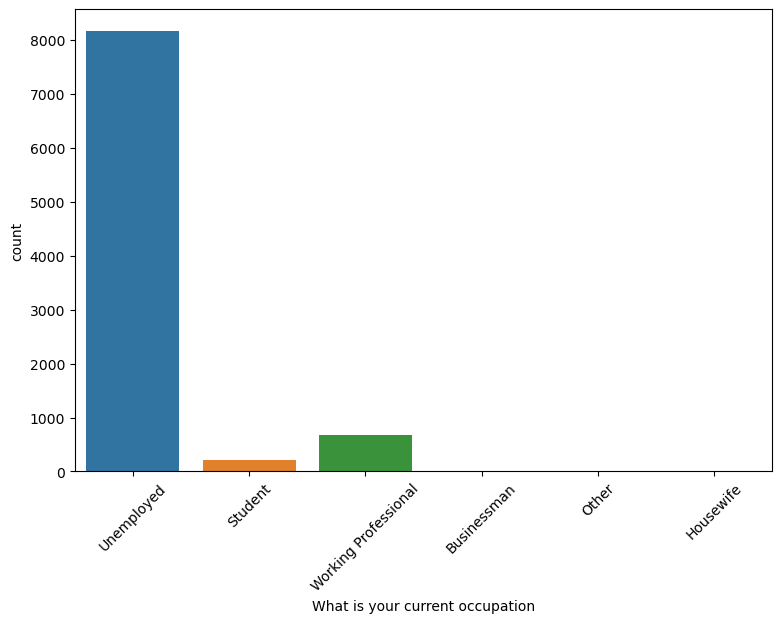

In [1597]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Specialization"])
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize = (9,6))
sns.countplot(df["What is your current occupation"])
plt.xticks(rotation = 45)
plt.show()

* Replacing the missing values in `Specialization` with `Others`

In [1598]:
df["Specialization"] = df["Specialization"].replace(np.nan, "Others")

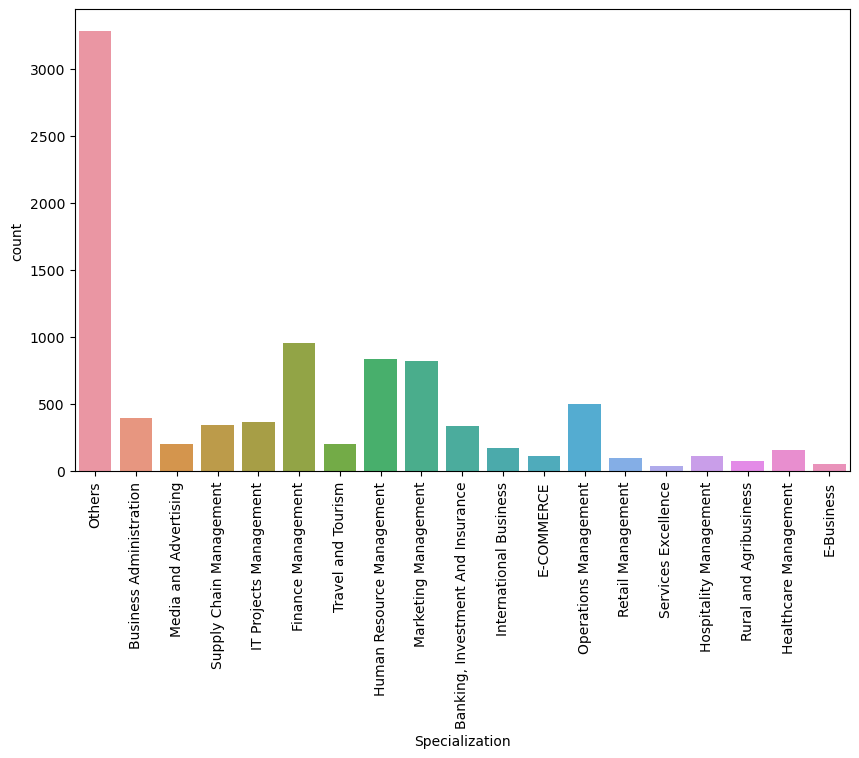

In [1599]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Specialization"])
plt.xticks(rotation=90)
plt.show()

#### Checking the distrubution of `Tags` feature

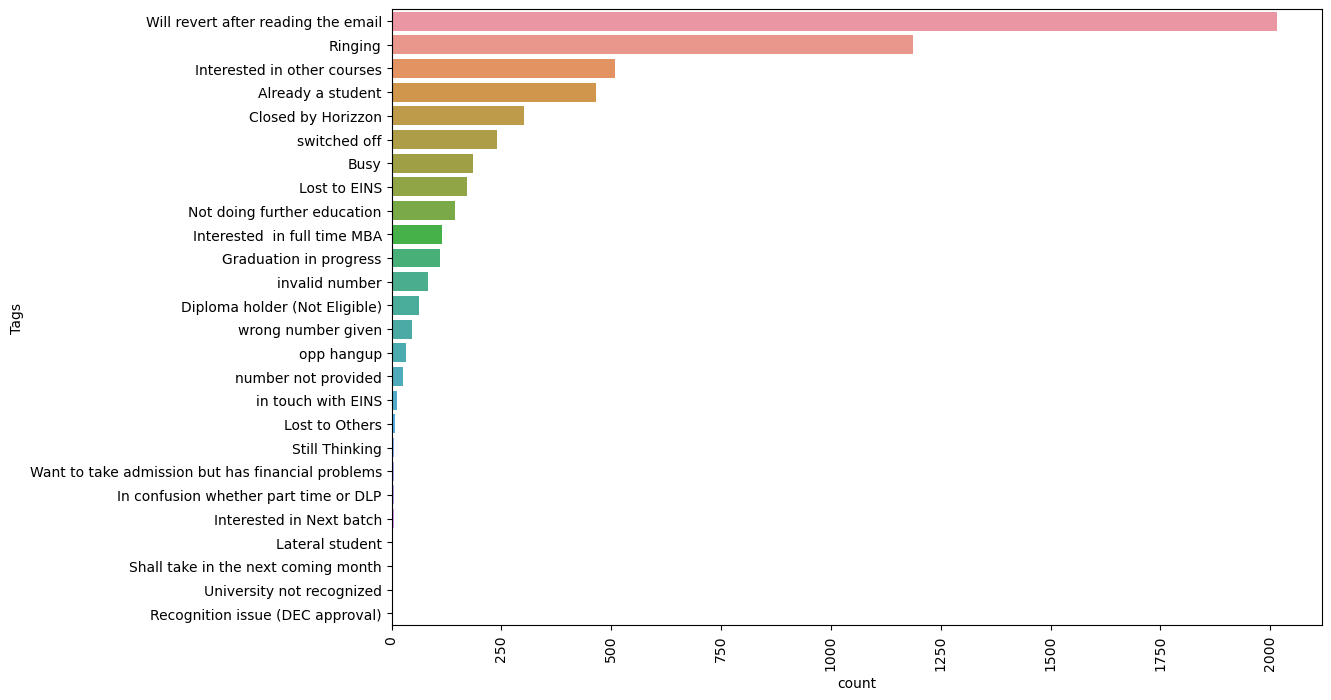

In [1600]:
plt.figure(figsize=(12,8))
sns.countplot(y=df["Tags"],order=df["Tags"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

* Replacing the missing values in `Tags` with `Unknown`

In [1601]:
df["Tags"] = df["Tags"].replace(np.nan, "Unknown")

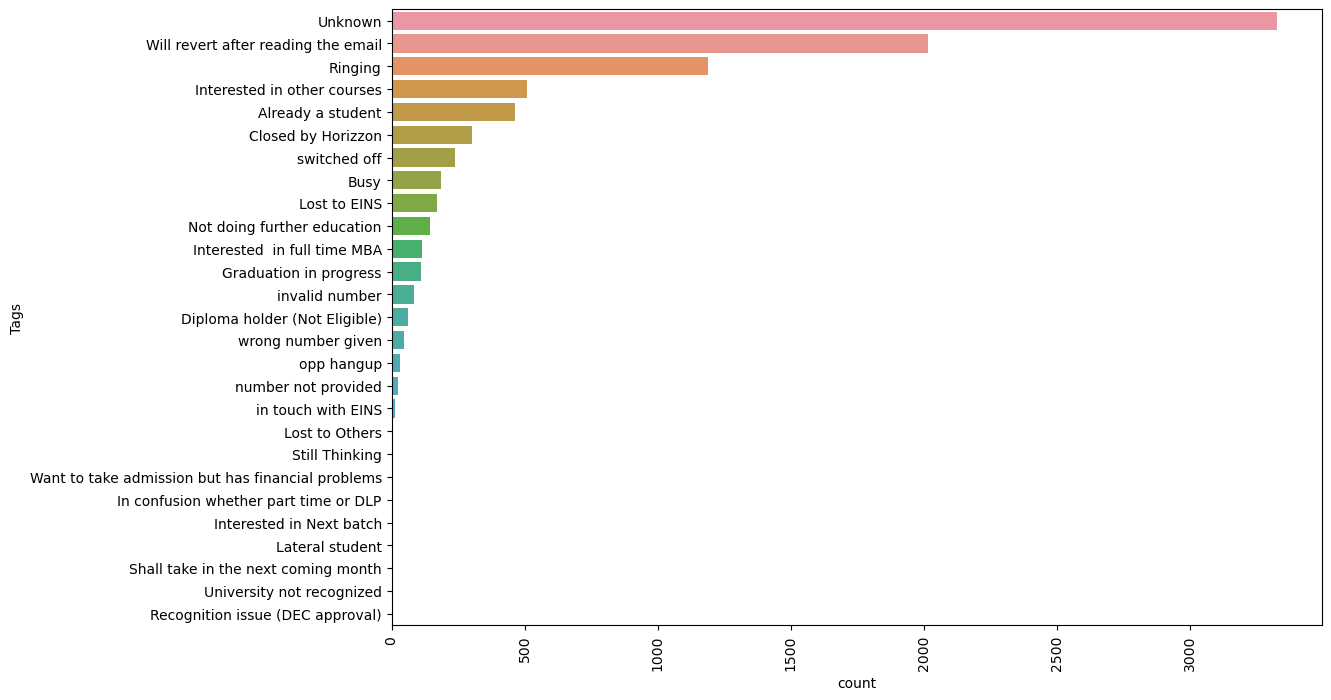

In [1602]:
plt.figure(figsize=(12,8))
sns.countplot(y=df["Tags"],order=df["Tags"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [1603]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2702
Lead Origin                                         0
Magazine                                            0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Tags                                                0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Search                                              0
Lead Source                                         0
What is your current occupation                     0
Specialization                                      0
Last Activity                                       0
Page Views Per Visit        

### Dropping Irrelevant features

In [1604]:
print(df['Do Not Email'].value_counts()/df.shape[0],'\n\n',
      df['Do Not Call'].value_counts()/df.shape[0],'\n\n',
      df['What matters most to you in choosing a course'].value_counts()/df.shape[0],'\n\n',
      df['I agree to pay the amount through cheque'].value_counts()/df.shape[0],'\n\n',
      df['Magazine'].value_counts()/df.shape[0],'\n\n',
      df['Get updates on DM Content'].value_counts()/df.shape[0],'\n\n',
      df['Update me on Supply Chain Content'].value_counts()/df.shape[0],'\n\n',
      df['Receive More Updates About Our Courses'].value_counts()/df.shape[0],'\n\n',
      df['Through Recommendations'].value_counts()/df.shape[0],'\n\n',
      df['Digital Advertisement'].value_counts()/df.shape[0],'\n\n',
      df['Newspaper'].value_counts()/df.shape[0],'\n\n',
      df['X Education Forums'].value_counts()/df.shape[0],'\n\n',
      df['Newspaper Article'].value_counts()/df.shape[0],'\n\n',
      df['X Education Forums'].value_counts()/df.shape[0],'\n\n',
      df['Search'].value_counts()/df.shape[0],'\n\n',
      df['A free copy of Mastering The Interview'].value_counts()/df.shape[0]
     )

No    0.92
Yes   0.08
Name: Do Not Email, dtype: float64 

 No    1.00
Yes   0.00
Name: Do Not Call, dtype: float64 

 Better Career Prospects     0.70
Flexibility & Convenience   0.00
Other                       0.00
Name: What matters most to you in choosing a course, dtype: float64 

 No   1.00
Name: I agree to pay the amount through cheque, dtype: float64 

 No   1.00
Name: Magazine, dtype: float64 

 No   1.00
Name: Get updates on DM Content, dtype: float64 

 No   1.00
Name: Update me on Supply Chain Content, dtype: float64 

 No   1.00
Name: Receive More Updates About Our Courses, dtype: float64 

 No    1.00
Yes   0.00
Name: Through Recommendations, dtype: float64 

 No    1.00
Yes   0.00
Name: Digital Advertisement, dtype: float64 

 No    1.00
Yes   0.00
Name: Newspaper, dtype: float64 

 No    1.00
Yes   0.00
Name: X Education Forums, dtype: float64 

 No    1.00
Yes   0.00
Name: Newspaper Article, dtype: float64 

 No    1.00
Yes   0.00
Name: X Education Forums, dtype: floa

In [1605]:
irrelevant = ['Do Not Email',
              'Do Not Call',
              'What matters most to you in choosing a course',
              'I agree to pay the amount through cheque',
              'Magazine',
              'Get updates on DM Content',
              'Update me on Supply Chain Content',
              'Receive More Updates About Our Courses',
              'Through Recommendations',
              'Digital Advertisement',
              'Newspaper',
              'X Education Forums',
              'Newspaper Article',
              'Search',
              'A free copy of Mastering The Interview',
              ]

In [1606]:
#As most of columns is one value dominating and seems not to derive any insight hence dropping:
df.drop(irrelevant, axis=1, inplace=True)

In [1607]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email


In [1608]:
df.shape

(9074, 10)

### Sanity Check

#### Checking distribution of `Lead Source` feature

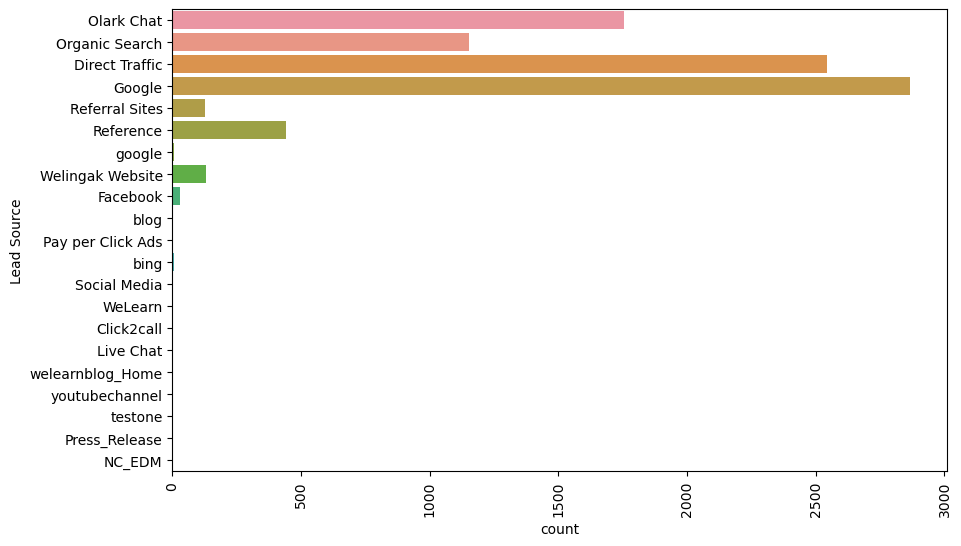

In [1609]:
plt.figure(figsize = (10,6))
sns.countplot(y=df["Lead Source"])
plt.xticks(rotation = 90)
plt.show()

In [1610]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

* There are 2 values that mean the same thing : `Google` and `google` in `Lead source` feature. We will replace it

In [1611]:
df["Lead Source"] = df["Lead Source"].replace("google", df["Lead Source"].mode()[0])

In [1612]:
#Replacing all lead source that contibutes to low counts as 'Others'
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Social Media', 'Live Chat','Press_Release',
                                 'Pay per Click Ads','blog','WeLearn','welearnblog_Home', 
                                 'youtubechannel', 'testone', 'NC_EDM'],'Others')

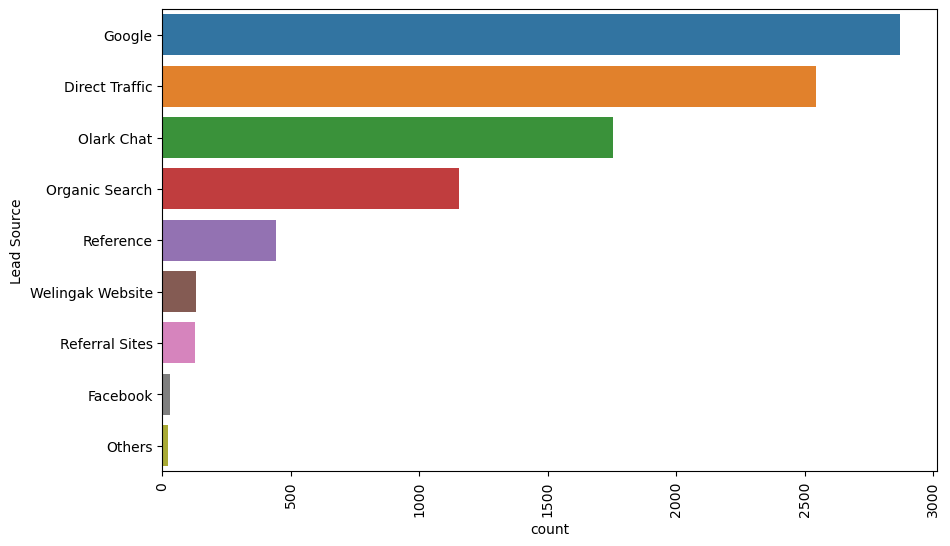

In [1613]:
plt.figure(figsize = (10,6))
sns.countplot(y=df["Lead Source"],order=df["Lead Source"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [1614]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1615]:
df['Last Activity'] = df['Last Activity'].replace(['View in browser link Clicked','Approached upfront',
                                                  'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                  'Resubscribed to emails'],'Others')

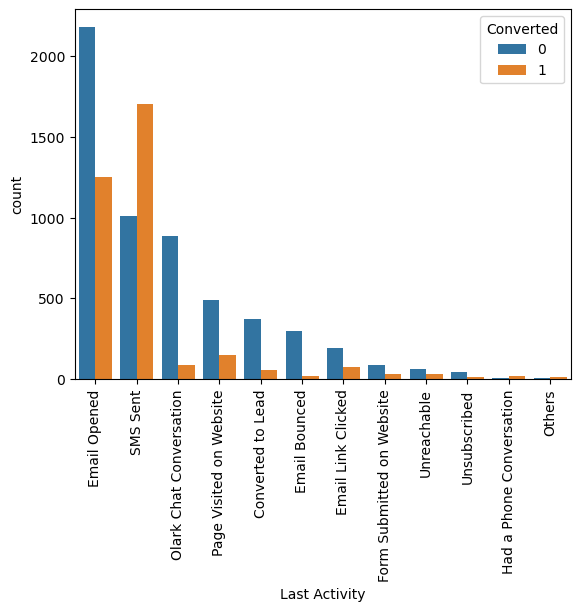

In [1616]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df, order=df['Last Activity'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [1617]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email


### Outlier Treatment

In [1618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Converted                        9074 non-null   int64  
 3   TotalVisits                      9074 non-null   float64
 4   Total Time Spent on Website      9074 non-null   int64  
 5   Page Views Per Visit             9074 non-null   float64
 6   Last Activity                    9074 non-null   object 
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   Tags                             9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


#### Creating Boxplots for Numeric features

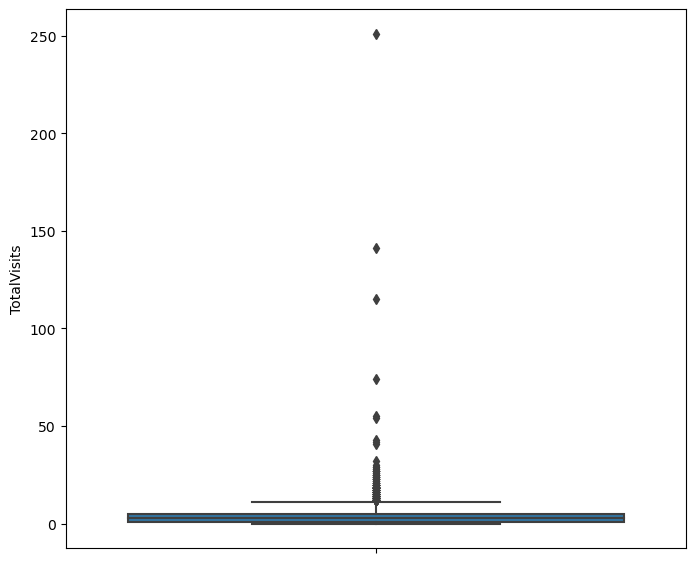

In [1619]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["TotalVisits"])
plt.show()

***Inference***

* We can see that there are outliers in `TotalVisits` column

In [1620]:
df[~(df["TotalVisits"] < 50)].shape

(6, 10)

In [1621]:
df = df[~(df["TotalVisits"] > 50)]

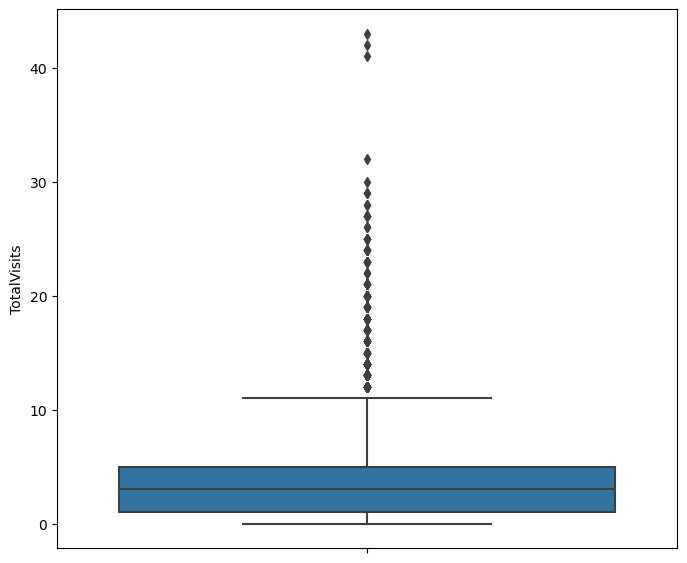

In [1622]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["TotalVisits"])
plt.show()

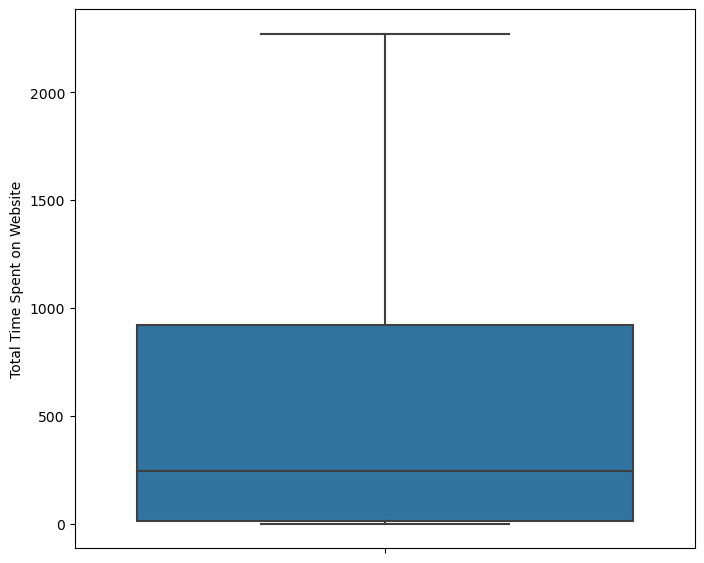

In [1623]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["Total Time Spent on Website"])
plt.show()

***Inference***

* There are no outliers in `Total Time Spent on Website` column

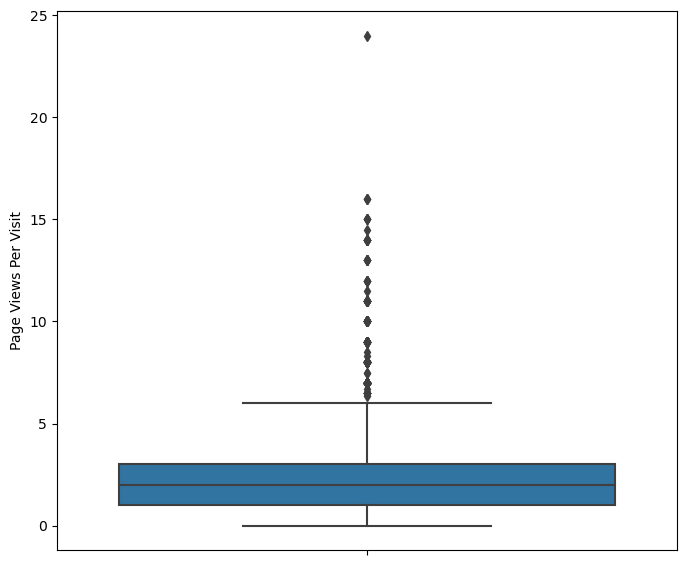

In [1624]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

***Inference***

* We can see that there are outliers in `Page Views Per Visit` column

In [1625]:
df[~(df["Page Views Per Visit"] < 20)].shape

(1, 10)

In [1626]:
df = df[~(df["Page Views Per Visit"] > 20)]

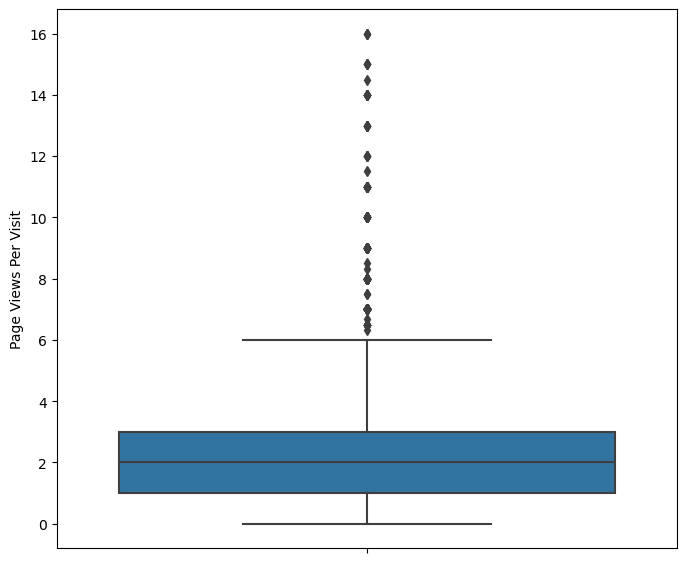

In [1627]:
plt.figure(figsize=(8,7))
sns.boxplot(y=df["Page Views Per Visit"])
plt.show()

In [1628]:
df.shape

(9067, 10)

# Step 3: EDA

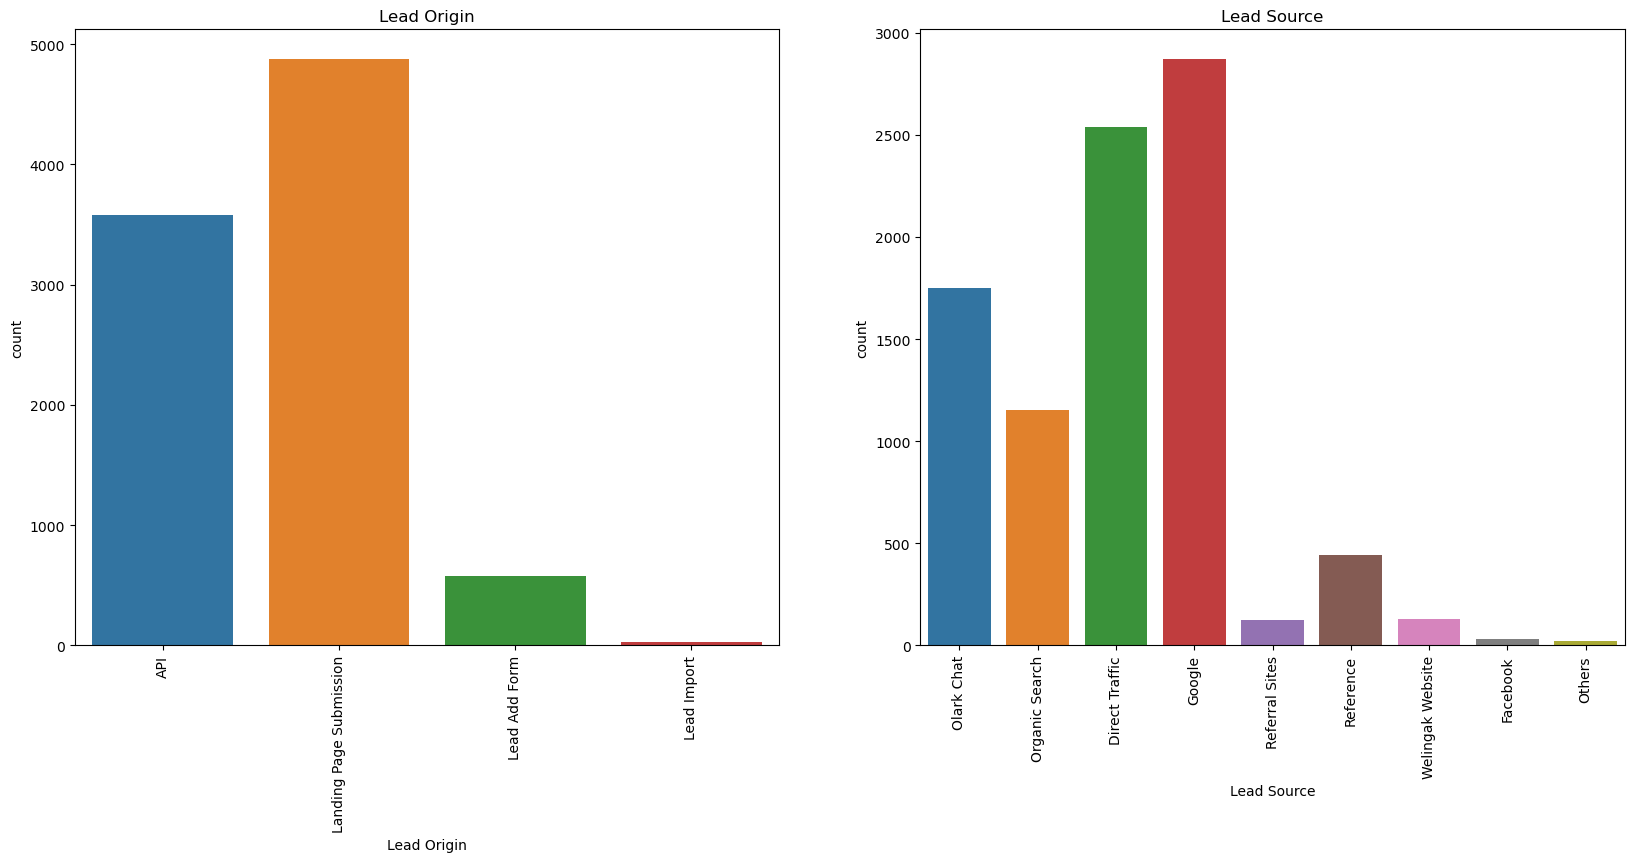

In [1629]:
category_col=['Lead Origin','Lead Source']

plt.figure(figsize=(20,20))
for i in range(len(category_col)):
    plt.subplot(2, 2, i+1)
    var=category_col[i]
    sns.countplot(x=var, data=df)
    plt.title(var)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace =0.5)


- In `Lead Origin`, the maximum number of leads are coming from `landing page submission` and `lead import` have lowest number of leads coming.
- In ` Lead Source` the `Google, Direct Traffic, and Olark Chat` shows the maximum number of lead source.


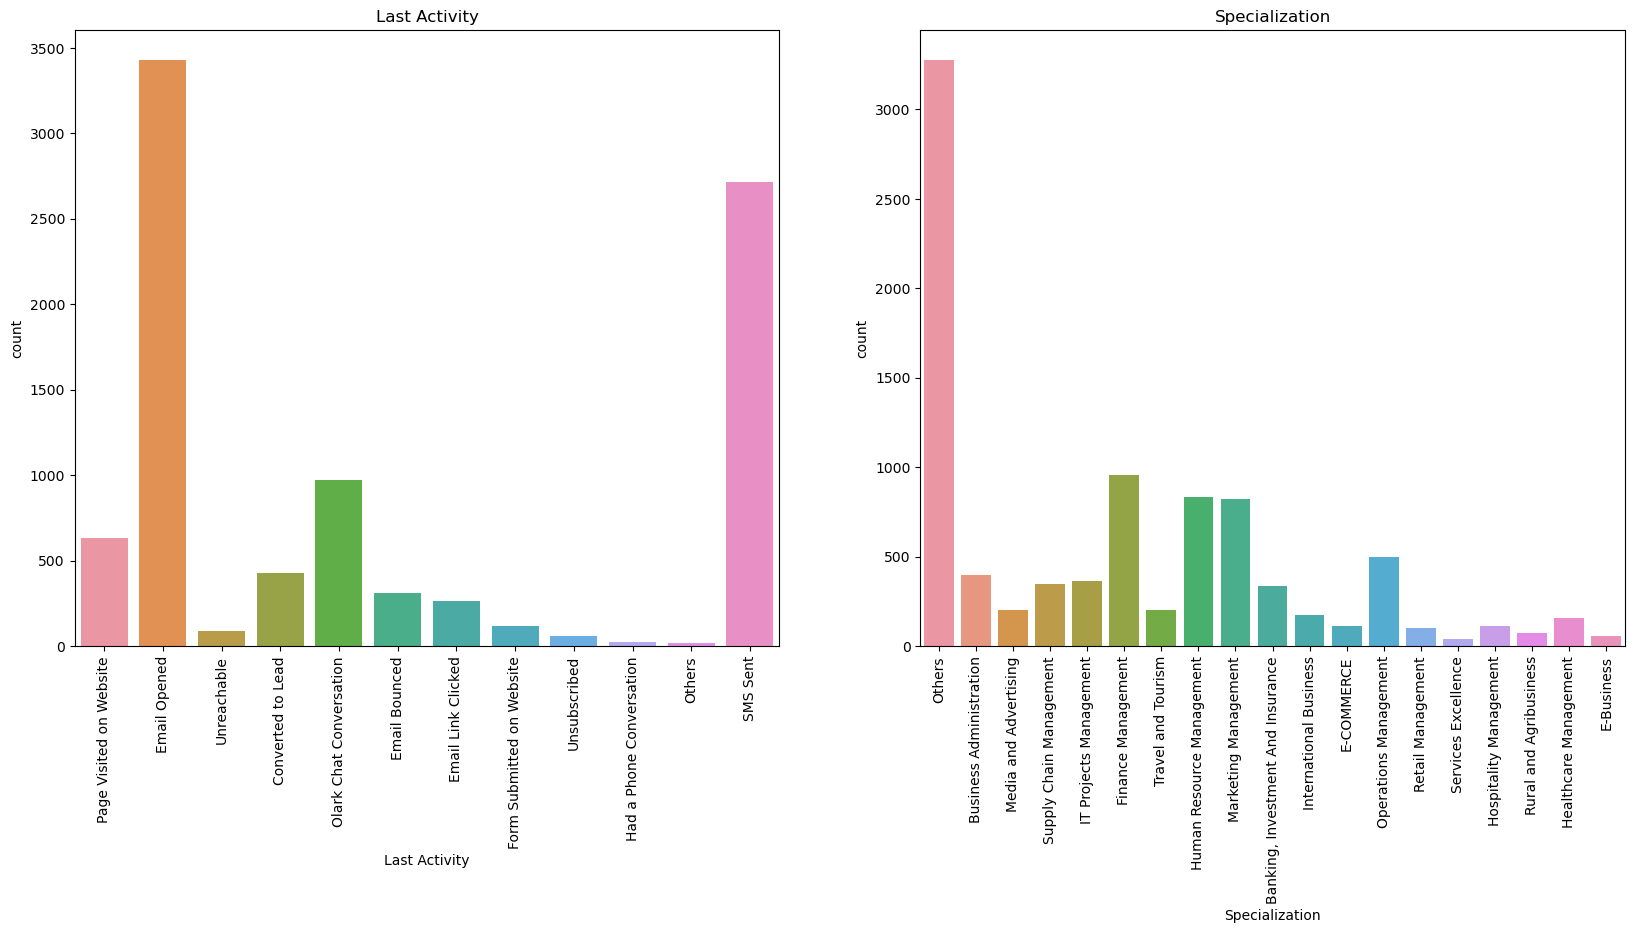

In [1630]:
category_col1 = ['Last Activity','Specialization']

plt.figure(figsize=(20,20))
for i in range(len(category_col1)):
    plt.subplot(2, 2, i+1)
    var=category_col1[i]
    sns.countplot(x=var, data=df)
    plt.title(var)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace =0.5)
    

- In `Last Activity` both the `Email Opened` & `SMS Sent` is the main engaging factor of the leads.
- We have `Others` leads as the highest number of leads in `Specialization`.

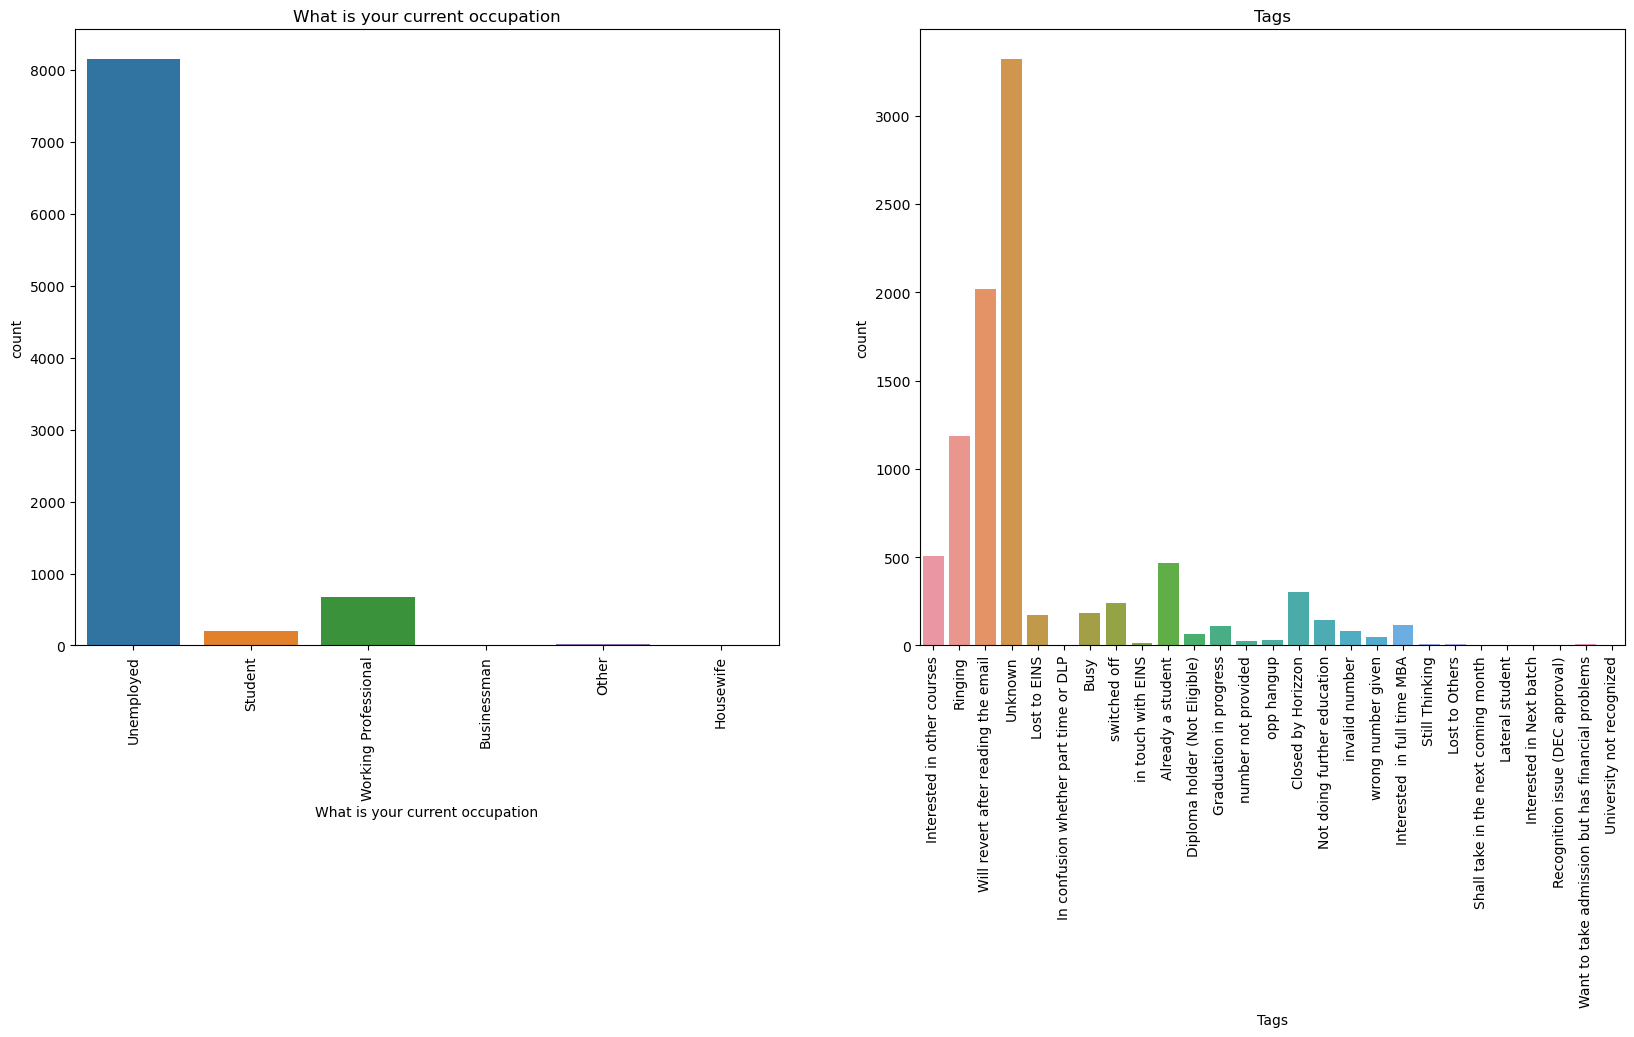

In [1631]:
category_col2=['What is your current occupation','Tags']

plt.figure(figsize=(20,20))
for i in range(len(category_col2)):
    plt.subplot(2, 2, i+1)
    var=category_col2[i]
    sns.countplot(x=var, data=df)
    plt.title(var)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace =0.5)

- In `What is your current occupation` we have highest number of leads as `Unemployed`.
- We have `Unknown` leads as the highest number of leads in `Tags`.

### Correlation Heatmap

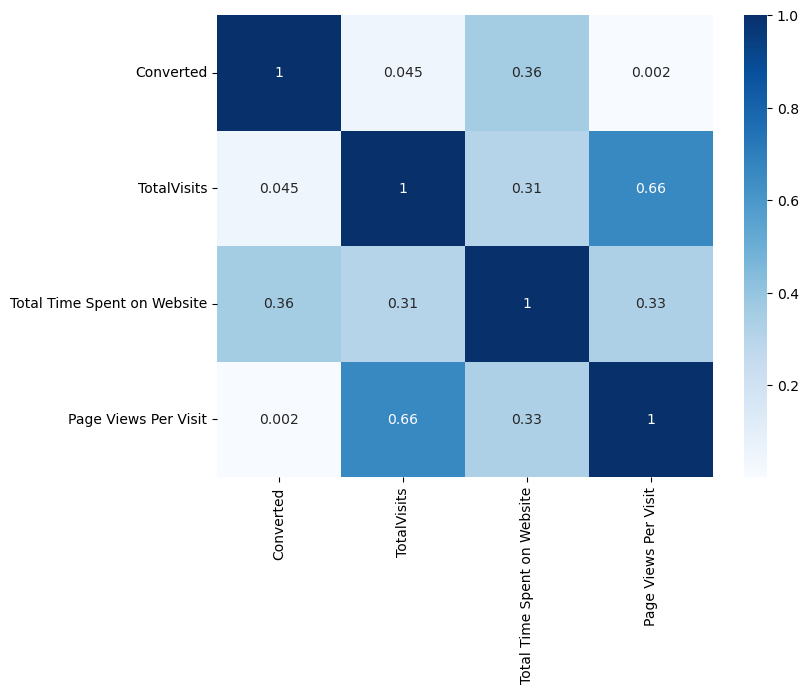

In [1632]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True, cmap="Blues")
plt.show()

***Inference***

* No numerical feature is highly correlated with the target variable (`Converted`).
* No numerical independent variable is highly correlated with other independant variable.

# Dummy variable

In [1633]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email


In [1634]:
df_dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags']], drop_first=True)

In [1635]:
df = pd.concat([df, df_dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,...,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,...,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,...,0,0,0,1,0,0,0,0,0,0


In [1636]:
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
        'Tags'], axis=1, inplace=True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.00,0,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# Step 4: Data Preparation

## Train Test Data Split

In [1637]:
df.shape

(9067, 75)

In [1638]:
x = df.drop('Converted', axis=1)
y = df['Converted']

In [1639]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)


In [1640]:
print(x_train.shape,'\n',x_test.shape)

(6346, 74) 
 (2721, 74)


In [1641]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
2178,5.00,94,5.00,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7033,0.00,0,0.00,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6889,0.00,0,0.00,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4062,5.00,467,2.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7421,27.00,212,2.45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1642]:
#Sacling
from sklearn.preprocessing import MinMaxScaler
num_vars =['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
2178,0.12,0.04,0.31,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7033,0.00,0.00,0.00,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6889,0.00,0.00,0.00,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4062,0.12,0.21,0.16,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7421,0.63,0.09,0.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1643]:
x_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
count,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,...,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00,6346.00
mean,0.08,0.21,0.15,0.54,0.07,0.00,0.00,0.32,0.19,0.13,...,0.00,0.36,0.00,0.23,0.00,0.01,0.00,0.00,0.03,0.01
std,0.08,0.24,0.13,0.50,0.25,0.06,0.06,0.47,0.40,0.33,...,0.02,0.48,0.03,0.42,0.04,0.09,0.05,0.05,0.16,0.07
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.07,0.11,0.12,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.12,0.40,0.21,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Step 5 : Model Building

### Model 1:

In [1644]:
model1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           74
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.2
Date:                Sat, 13 Jan 2024   Deviance:                       2444.4
Time:                        17:13:56   Pearson chi2:                 7.69e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6118
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -8.8323      4.339     -2.036      0.042     -17.336      -0.329
TotalVisits                                                2.6775      0.889      3.012      0.003       0.935       4.420
Total Time Spent on Website                                4.7326      0.268     17.679      0.000       4.208       5.257
Page Views Per Visit                                      -0.6097      0.643     -0.949      0.343      -1.870       0.650
Lead Origin_Landing Page Submission                       -0.6504      0.236     -2.757      0.006      -1.113      -0.188
Lead Origin_Lead Add Form                                 -0.9102      2.354     -0.387      0.699      -5.525       3.705
Lead Origin_Lead Import                                   26.0250   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                     -24.8123   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                         0.3971      0.160      2.486      0.013       0.084       0.710
Lead Source_Olark Chat                                     1.4576      0.234      6.216      0.000       0.998       1.917
Lead Source_Organic Search                                 0.3687      0.209      1.762      0.078      -0.041       0.779
Lead Source_Others                                         1.1816      0.864      1.368      0.171      -0.512       2.875
Lead Source_Reference                                      2.4209      2.397      1.010      0.313      -2.278       7.120
Lead Source_Referral Sites                                 0.1435      0.552      0.260      0.795      -0.938       1.225
Lead Source_Welingak Website                               6.5201      2.471      2.639      0.008       1.677      11.363
Last Activity_Email Bounced                                0.0124      0.558      0.022      0.982      -1.081       1.106
Last Activity_Email Link Clicked                           0.6908      0.485      1.425      0.154      -0.259       1.641
Last Activity_Email Opened                                 1.4411      0.371      3.881      0.000       0.713       2.169
Last Activity_Form Submitted on Website                    0.3841      0.647      0.594      0.552      -0.883       1.651
Last Activity_Had a Phone Conversation                     1.5707      1.267      1.239      0.215      -0.913       4.055
Last Activity_Olark Chat Conversation                     -0.4242      0.428     -0.990      0.322      -1.264       0.415
Last Activity_Others                                       2.0161      1.394      1.447      0.148      -0.715       4.747
Last Act

In [1645]:
lr = LogisticRegression()

rfe = RFE(lr, n_features_to_select=15)             
rfe = rfe.fit(x_train, y_train)

In [1646]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 24),
 ('Lead Source_Reference', False, 42),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 20),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 60),
 ('Last Activity_Had a Phone Conversation', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Others', False, 16),
 ('Last Activity_Page Visited on Website', False, 41),
 ('Last Activity_SMS Sent', True, 1),
 (

In [1647]:
rfe_col = x_train.columns[rfe.support_]
rfe_col


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [1648]:
x_train_new=x_train[rfe_col]


## Model 2

In [1649]:
x_train_new = sm.add_constant(x_train_new)

model_2 = sm.GLM(y_train,x_train_new, family = sm.families.Binomial())
m2 = model_2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1325.0
Date:                Sat, 13 Jan 2024   Deviance:                       2649.9
Time:                        17:14:01   Pearson chi2:                 6.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5991
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5259      0.236    -23.377      0.000      -5.989      -5.063
Total Time Spent on Website                  4.5728      0.251     18.192      0.000       4.080       5.065
Lead Origin_Lead Add Form                    1.6714      0.436      3.835      0.000       0.817       2.526
Lead Source_Olark Chat                       1.1996      0.141      8.500      0.000       0.923       1.476
Lead Source_Welingak Website                 4.0401      0.850      4.753      0.000       2.374       5.706
Last Activity_SMS Sent                       2.1362      0.112     19.074      0.000       1.917       2.356
Tags_Busy                                    3.1305      0.308     10.150      0.000       2.526       3.735
Tags_Closed by Horizzon                      8.5280      0.755     11.298      0.000       7.049      10.007
Tags_Interested in Next batch               24.8304   3.83e+04      0.001      0.999    -7.5e+04     7.5e+04
Tags_Lateral student                        25.7043   5.61e+04      0.000      1.000    -1.1e+05     1.1e+05
Tags_Lost to EINS                            7.5455      0.631     11.949      0.000       6.308       8.783
Tags_Ringing                                -0.6088      0.300     -2.032      0.042      -1.196      -0.021
Tags_Unknown                                 2.2729      0.214     10.613      0.000       1.853       2.693
Tags_Will revert after reading the email     7.0167      0.273     25.732      0.000       6.482       7.551
Tags_switched off                           -1.3451      0.649     -2.073      0.038      -2.617      -0.073
Tags_wrong number given                    -20.5584   1.21e+04     -0.002      0.999   -2.38e+04    2.37e+04
============================================================================================================
"""

#### Checking VIF score

In [1650]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.02
13,Tags_Will revert after reading the email,2.17
12,Tags_Unknown,2.03
2,Lead Origin_Lead Add Form,1.70
11,Tags_Ringing,1.55
1,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.33
7,Tags_Closed by Horizzon,1.32
3,Lead Source_Olark Chat,1.30
5,Last Activity_SMS Sent,1.17


* Dropping `Tags_wrong number given` because it has a very high p-value

In [1651]:
x_train_new.drop("Tags_wrong number given", axis=1, inplace=True)

## Model 3

In [1652]:
x_train_new = sm.add_constant(x_train_new)

model_3 = sm.GLM(y_train,x_train_new, family = sm.families.Binomial())
m3 = model_3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1326.8
Date:                Sat, 13 Jan 2024   Deviance:                       2653.6
Time:                        17:14:01   Pearson chi2:                 6.65e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5988
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5928      0.236    -23.650      0.000      -6.056      -5.129
Total Time Spent on Website                  4.5752      0.251     18.204      0.000       4.083       5.068
Lead Origin_Lead Add Form                    1.6754      0.436      3.839      0.000       0.820       2.531
Lead Source_Olark Chat                       1.2018      0.141      8.514      0.000       0.925       1.479
Lead Source_Welingak Website                 4.0362      0.850      4.747      0.000       2.370       5.703
Last Activity_SMS Sent                       2.1274      0.112     19.036      0.000       1.908       2.346
Tags_Busy                                    3.2022      0.308     10.407      0.000       2.599       3.805
Tags_Closed by Horizzon                      8.5933      0.755     11.384      0.000       7.114      10.073
Tags_Interested in Next batch               22.9041   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
Tags_Lateral student                        23.7785   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Tags_Lost to EINS                            7.6118      0.631     12.053      0.000       6.374       8.849
Tags_Ringing                                -0.5363      0.299     -1.795      0.073      -1.122       0.049
Tags_Unknown                                 2.3420      0.214     10.961      0.000       1.923       2.761
Tags_Will revert after reading the email     7.0837      0.273     25.985      0.000       6.549       7.618
Tags_switched off                           -1.2720      0.648     -1.961      0.050      -2.543      -0.001
============================================================================================================
"""

#### Checking VIF score

In [1653]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.84
13,Tags_Will revert after reading the email,2.14
12,Tags_Unknown,1.99
2,Lead Origin_Lead Add Form,1.70
11,Tags_Ringing,1.53
1,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.33
7,Tags_Closed by Horizzon,1.32
3,Lead Source_Olark Chat,1.30
5,Last Activity_SMS Sent,1.17


* Dropping `Tags_Interested in Next batch` because it has a very high p-value

In [1654]:
x_train_new.drop("Tags_Interested in Next batch", axis=1, inplace=True)

## Model 4

In [1655]:
x_train_new = sm.add_constant(x_train_new)

model_4 = sm.GLM(y_train,x_train_new, family = sm.families.Binomial())
m4 = model_4.fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1332.5
Date:                Sat, 13 Jan 2024   Deviance:                       2665.0
Time:                        17:14:01   Pearson chi2:                 6.66e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5981
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4956      0.227    -24.175      0.000      -5.941      -5.050
Total Time Spent on Website                  4.5819      0.250     18.313      0.000       4.092       5.072
Lead Origin_Lead Add Form                    1.8270      0.440      4.152      0.000       0.965       2.689
Lead Source_Olark Chat                       1.2032      0.141      8.534      0.000       0.927       1.480
Lead Source_Welingak Website                 3.8902      0.852      4.565      0.000       2.220       5.560
Last Activity_SMS Sent                       2.1488      0.112     19.262      0.000       1.930       2.367
Tags_Busy                                    3.0897      0.301     10.266      0.000       2.500       3.680
Tags_Closed by Horizzon                      8.4521      0.750     11.268      0.000       6.982       9.922
Tags_Lateral student                        22.6581   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Tags_Lost to EINS                            7.5095      0.628     11.952      0.000       6.278       8.741
Tags_Ringing                                -0.6589      0.292     -2.259      0.024      -1.230      -0.087
Tags_Unknown                                 2.2338      0.204     10.969      0.000       1.835       2.633
Tags_Will revert after reading the email     6.9688      0.264     26.397      0.000       6.451       7.486
Tags_switched off                           -1.3906      0.645     -2.154      0.031      -2.656      -0.126
============================================================================================================
"""

#### Checking VIF score

In [1656]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.84
12,Tags_Will revert after reading the email,2.13
11,Tags_Unknown,1.99
2,Lead Origin_Lead Add Form,1.70
10,Tags_Ringing,1.53
1,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.33
7,Tags_Closed by Horizzon,1.31
3,Lead Source_Olark Chat,1.30
5,Last Activity_SMS Sent,1.17


* Dropping `Tags_Lateral student` because it has a very high p-value

In [1657]:
x_train_new.drop("Tags_Lateral student", axis=1, inplace=True)

## Model 5

In [1658]:
x_train_new = sm.add_constant(x_train_new)

model_5 = sm.GLM(y_train,x_train_new, family = sm.families.Binomial())
m5 = model_5.fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.8
Date:                Sat, 13 Jan 2024   Deviance:                       2673.7
Time:                        17:14:01   Pearson chi2:                 6.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5976
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4347      0.222    -24.430      0.000      -5.871      -4.999
Total Time Spent on Website                  4.5706      0.250     18.309      0.000       4.081       5.060
Lead Origin_Lead Add Form                    1.8192      0.439      4.144      0.000       0.959       2.680
Lead Source_Olark Chat                       1.2113      0.141      8.601      0.000       0.935       1.487
Lead Source_Welingak Website                 3.9006      0.852      4.579      0.000       2.231       5.570
Last Activity_SMS Sent                       2.1633      0.111     19.409      0.000       1.945       2.382
Tags_Busy                                    3.0222      0.298     10.151      0.000       2.439       3.606
Tags_Closed by Horizzon                      8.3943      0.749     11.211      0.000       6.927       9.862
Tags_Lost to EINS                            7.4487      0.627     11.886      0.000       6.220       8.677
Tags_Ringing                                -0.7272      0.288     -2.522      0.012      -1.292      -0.162
Tags_Unknown                                 2.1670      0.199     10.908      0.000       1.778       2.556
Tags_Will revert after reading the email     6.9079      0.260     26.554      0.000       6.398       7.418
Tags_switched off                           -1.4599      0.644     -2.267      0.023      -2.722      -0.198
============================================================================================================
"""

#### Checking VIF score

In [1659]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.83
11,Tags_Will revert after reading the email,2.12
10,Tags_Unknown,1.98
2,Lead Origin_Lead Add Form,1.70
9,Tags_Ringing,1.52
1,Total Time Spent on Website,1.45
4,Lead Source_Welingak Website,1.33
7,Tags_Closed by Horizzon,1.31
3,Lead Source_Olark Chat,1.30
5,Last Activity_SMS Sent,1.17


- Since p value < 0.05 and VIF <5 , so this model looks good. Lets Evaluate this training set.

# Step 6 : Model Evaluation

In [1660]:
y_train_pred = m5.predict(x_train_new)
y_train_pred[:10]

2178   0.29
7033   0.99
6889   0.11
4062   1.00
7421   0.97
421    0.00
3120   0.98
6245   0.11
3045   0.75
1306   0.87
dtype: float64

In [1661]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28591793, 0.99019804, 0.11340462, 0.99999236, 0.96726472,
       0.00154657, 0.97866057, 0.11340462, 0.74996858, 0.87389841])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [1662]:
y_train.head()

2178    0
7033    1
6889    0
4062    1
7421    1
Name: Converted, dtype: int64

In [1663]:
y_train_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_df["LeadID"] = y_train.index
y_train_df.head()

,Converted,Converted_Prob,LeadID
0,0,0.29,2178
1,1,0.99,7033
2,0,0.11,6889
3,1,1.00,4062
4,1,0.97,7421


#### Creating a new column for the predictions of the model with a cut-off of 0.5 where predictions are 1 if `converted_prob` > 0.5 else 0

In [1664]:
y_train_df["final_prediction1"] = y_train_df["Converted_Prob"].map(lambda x:1 if x > 0.5 else 0)

In [1665]:
y_train_df.head()

,Converted,Converted_Prob,LeadID,final_prediction1
0,0,0.29,2178,0
1,1,0.99,7033,1
2,0,0.11,6889,0
3,1,1.00,4062,1
4,1,0.97,7421,1


#### Evaluating the model for the train set

Finding the confusion matrix

In [1666]:
train_conf = metrics.confusion_matrix(y_train_df["Converted"], y_train_df["final_prediction1"])
train_conf

array([[3741,  171],
       [ 317, 2117]])

In [1667]:
TP = train_conf[1,1] # true positive 
TN = train_conf[0,0] # true negatives
FP = train_conf[0,1] # false positives
FN = train_conf[1,0] # false negatives

#### Accuracy

In [1668]:
train_accuracy = metrics.accuracy_score(y_train_df["Converted"], y_train_df["final_prediction1"])
train_accuracy

0.9231011660888749

#### Sensitivity

In [1669]:
sensitivity = TP/(TP+FN)
sensitivity

0.8697617091207889

#### Specificity

In [1670]:
specificity = TN/(TN+FP)
specificity

0.9562883435582822

#### False postive rate - predicting converted when customer does not have converted

In [1671]:
FPR = FP/ (TN+FP)
FPR

0.04371165644171779

#### Precision (Positive Predicted Value)

In [1672]:
precision = TP/ (TP+FP)
precision

0.9252622377622378

#### Negative predictive value

In [1673]:
NPV = TN /(TN+ FN)
NPV

0.9218827008378512

# Step 6 : ROC Curve

In [1674]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [1675]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_df['Converted'], y_train_df['Converted_Prob'], drop_intermediate = False )

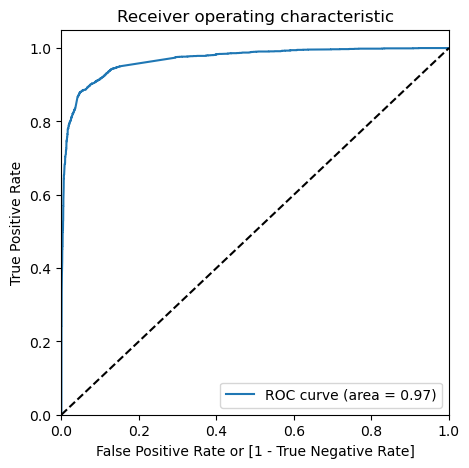

In [1676]:
roc(y_train_df['Converted'], y_train_df['Converted_Prob'])

# Step 7: Finding Optimal Cut Off

In [1677]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_df.head()

,Converted,Converted_Prob,LeadID,final_prediction1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.29,2178,0,1,1,1,0,0,0,0,0,0,0
1,1,0.99,7033,1,1,1,1,1,1,1,1,1,1,1
2,0,0.11,6889,0,1,1,0,0,0,0,0,0,0,0
3,1,1.00,4062,1,1,1,1,1,1,1,1,1,1,1
4,1,0.97,7421,1,1,1,1,1,1,1,1,1,1,1


In [1678]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.Converted, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.80   0.98   0.69
0.20  0.20      0.90   0.93   0.88
0.30  0.30      0.91   0.91   0.91
0.40  0.40      0.92   0.89   0.94
0.50  0.50      0.92   0.87   0.96
0.60  0.60      0.91   0.82   0.97
0.70  0.70      0.91   0.81   0.98
0.80  0.80      0.91   0.78   0.98
0.90  0.90      0.88   0.71   0.99


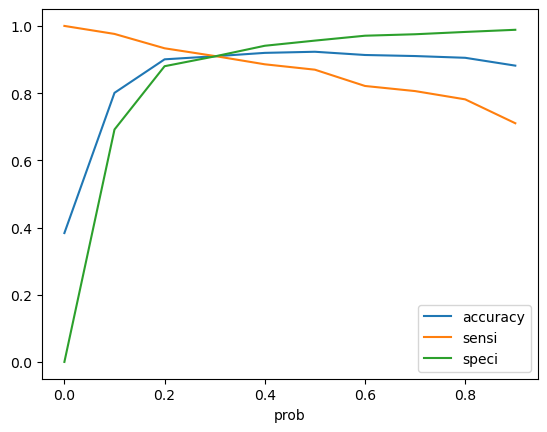

In [1679]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From above graph intersection point is 0.3, so changing cut off value from 0.5 to 0.3

In [1680]:
y_train_df['final_prediction'] = y_train_df['Converted_Prob'].map( lambda x: 1 if x > 0.3 else 0)
y_train_df.head()

,Converted,Converted_Prob,LeadID,final_prediction1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.29,2178,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.99,7033,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.11,6889,0,1,1,0,0,0,0,0,0,0,0,0
3,1,1.00,4062,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.97,7421,1,1,1,1,1,1,1,1,1,1,1,1


In [1681]:
# checking accuracy
metrics.accuracy_score(y_train_df["Converted"], y_train_df["final_prediction"])

0.9097069019855026

In [1682]:
train_conf1 = metrics.confusion_matrix(y_train_df["Converted"], y_train_df["final_prediction"])
train_conf1

array([[3557,  355],
       [ 218, 2216]])

In [1683]:
TP = train_conf[1,1] # true positive 
TN = train_conf[0,0] # true negatives
FP = train_conf[0,1] # false positives
FN = train_conf[1,0] # false negatives

#### Accuracy

In [1684]:
train_accuracy = metrics.accuracy_score(y_train_df["Converted"], y_train_df["final_prediction"])
train_accuracy

0.9097069019855026

#### Sensitivity

In [1685]:
sensitivity = TP/(TP+FN)
sensitivity

0.8697617091207889

#### Specificity

In [1686]:
specificity = TN/(TN+FP)
specificity

0.9562883435582822

#### False postive rate - predicting converted when customer does not have converted

In [1687]:
FPR = FP/ (TN+FP)
FPR

0.04371165644171779

#### Precision (Positive Predicted Value)

In [1688]:
precision = TP/ (TP+FP)
precision


0.9252622377622378

#### Negative predictive value

In [1689]:
NPV = TN /(TN+ FN)
NPV

0.9218827008378512

# Step 8: Precision & Recall

#### Precision

In [1690]:
train_conf1[1,1]/(train_conf1[0,1]+train_conf1[1,1])

0.8619214313496694

#### Recall

In [1691]:
train_conf1[1,1]/(train_conf1[1,0]+train_conf1[1,1])

0.9104354971240756

## Precison & Recall TradeOff

In [1692]:
p, r, thresholds = precision_recall_curve(y_train_df['Converted'], y_train_df['Converted_Prob'])

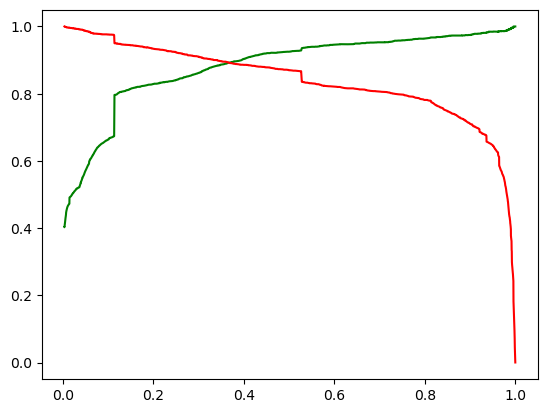

In [1693]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 9: Evaluate Test Data

In [1694]:
x_test[num_vars] = scaler.fit_transform(x_test[num_vars])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
2178,0.12,0.04,0.31,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7033,0.00,0.00,0.00,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6889,0.00,0.00,0.00,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4062,0.12,0.21,0.16,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7421,0.63,0.09,0.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1695]:
x_train_new.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [1696]:
x_test=x_test[['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_switched off']]
x_test

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off
3053,0.23,0,0,0,0,0,0,0,0,0,0,0
686,0.43,0,0,0,0,0,0,0,0,0,1,0
4091,0.62,0,0,0,0,0,1,0,0,0,0,0
737,0.00,1,0,1,0,0,0,0,0,0,1,0
4390,0.19,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4420,0.67,0,0,0,0,0,1,0,0,0,0,0
3794,0.12,0,0,0,0,0,0,0,0,1,0,0
6706,0.52,0,0,0,0,0,0,0,0,0,0,0
1248,0.66,0,0,0,1,0,0,0,1,0,0,0


In [1697]:
x_test = sm.add_constant(x_test)
x_test.reset_index()

,index,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off
0,3053,1.00,0.23,0,0,0,0,0,0,0,0,0,0,0
1,686,1.00,0.43,0,0,0,0,0,0,0,0,0,1,0
2,4091,1.00,0.62,0,0,0,0,0,1,0,0,0,0,0
3,737,1.00,0.00,1,0,1,0,0,0,0,0,0,1,0
4,4390,1.00,0.19,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,4420,1.00,0.67,0,0,0,0,0,1,0,0,0,0,0
2717,3794,1.00,0.12,0,0,0,0,0,0,0,0,1,0,0
2718,6706,1.00,0.52,0,0,0,0,0,0,0,0,0,0,0
2719,1248,1.00,0.66,0,0,0,1,0,0,0,1,0,0,0


In [1698]:
y_test_pred_df = m5.predict(x_test)

In [1699]:
y_pred_1 = pd.DataFrame(y_test_pred_df)
y_pred_1.head()

,0
3053,0.01
686,0.97
4091,1.00
737,1.00
4390,0.08


In [1700]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3053,0
686,1
4091,1
737,1
4390,0


In [1701]:
y_test_df['LeadID'] = y_test_df.index

In [1702]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1703]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1704]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
columns_titles = ['LeadID','Converted','Converted_Prob']
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,0,3053,0.01
1,1,686,0.97
2,1,4091,1.00
3,1,737,1.00
4,0,4390,0.08


#### Creating a column of predictions with the optimal cut-off as 0.3, where result will be 1 if `Converted_prob` > 0.3 else 0

In [1705]:
y_pred_final['final_prediction'] = y_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.3 else 0)

In [1706]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_prediction
0,0,3053,0.01,0
1,1,686,0.97,1
2,1,4091,1.00,1
3,1,737,1.00,1
4,0,4390,0.08,0


### Test Dataset Evaluation

#### Accuracy

In [1707]:
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_prediction"])

0.9070194781330393

In [1708]:
conf3 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["final_prediction"])
conf3

array([[1554,  168],
       [  85,  914]])

In [1709]:
TP = conf3[1,1] # true positive 
TN = conf3[0,0] # true negatives
FP = conf3[0,1] # false positives
FN = conf3[1,0] # false negatives

#### Sensitivity

In [1710]:
TP / float(TP+FN)

0.914914914914915

#### Specificity

In [1711]:
TN / float(TN+FP)

0.9024390243902439

#### False Positive Rate

In [1712]:
FP/ float(TN+FP)

0.0975609756097561

#### Positive predictive value 

In [1713]:
TP / float(TP+FP)

0.844731977818854

#### Negative predictive value

In [1714]:
TN / float(TN+ FN)

0.9481391092129348

#### Precision

In [1715]:
precision_score(y_pred_final["Converted"], y_pred_final["final_prediction"])

0.844731977818854

#### Recall

In [1716]:
recall_score(y_pred_final["Converted"], y_pred_final["final_prediction"])

0.914914914914915

#### F-1 Score

* F1 = 2×(Precision*Recall)/(Precision+Recall)

In [1717]:
f1_score(y_pred_final["Converted"], y_pred_final["final_prediction"])

0.8784238346948582

#### Classification Report

In [1718]:
print(classification_report(y_pred_final["Converted"], y_pred_final["final_prediction"]))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1722
           1       0.84      0.91      0.88       999

    accuracy                           0.91      2721
   macro avg       0.90      0.91      0.90      2721
weighted avg       0.91      0.91      0.91      2721



## Plotting ROC Curve

#### ROC function

In [1719]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1720]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], 
                                         y_pred_final["Converted_Prob"], 
                                         drop_intermediate = False )

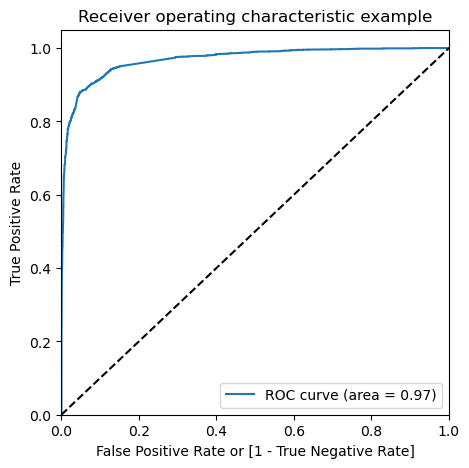

In [1721]:
draw_roc(y_train_df.Converted, y_train_df.Converted_Prob)

In [1722]:
leads_test = y_pred_final.copy()
leads_test.head()

,Converted,LeadID,Converted_Prob,final_prediction
0,0,3053,0.01,0
1,1,686,0.97,1
2,1,4091,1.00,1
3,1,737,1.00,1
4,0,4390,0.08,0


In [1723]:
leads_train = y_train_df.copy()
leads_train.head()

,Converted,Converted_Prob,LeadID,final_prediction1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.29,2178,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.99,7033,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.11,6889,0,1,1,0,0,0,0,0,0,0,0,0
3,1,1.00,4062,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.97,7421,1,1,1,1,1,1,1,1,1,1,1,1


#### Dropping unnecessary columns from train dataset

In [1724]:
leads_train = leads_train[['LeadID','Converted','Converted_Prob','final_prediction']]
leads_train.shape

(6346, 4)

#### Appending the 2 dataframes `leads_train` and `leads_test` row-wise using append() function to calculate the lead score for each record in the dataset.

In [1725]:
leads_final = leads_train.append(leads_test)
leads_final.head()

,LeadID,Converted,Converted_Prob,final_prediction
0,2178,0,0.29,0
1,7033,1,0.99,1
2,6889,0,0.11,0
3,4062,1,1.00,1
4,7421,1,0.97,1


#### Checking the shape of each dataframe

In [1726]:
print(leads_train.shape)
print(leads_test.shape)
print(leads_final.shape)

(6346, 4)
(2721, 4)
(9067, 4)


#### Checking if all the values in LeadID column are unique or not

In [1727]:
leads_final["LeadID"].nunique()

9067

* All the values are unique in `LeadID`

#### Calculating the Lead Score value

In [1728]:
# Lead Score = 100 * Conversion_Prob
leads_final['Lead_Score'] = leads_final['Converted_Prob'].apply(lambda x : round(x*100))
leads_final.head()

,LeadID,Converted,Converted_Prob,final_prediction,Lead_Score
0,2178,0,0.29,0,29
1,7033,1,0.99,1,99
2,6889,0,0.11,0,11
3,4062,1,1.00,1,100
4,7421,1,0.97,1,97


In [1729]:
# Inspecing the max LeadID
leads_final.LeadID.max()

9239

In [1730]:
leads_final = leads_final.set_index('LeadID').sort_index(axis=0, ascending = True)
leads_final.head()

,Converted,Converted_Prob,final_prediction,Lead_Score
LeadID,,,,
0,0,0.01,0,1
1,0,0.01,0,1
2,1,0.99,1,99
3,0,0.00,0,0
4,1,0.99,1,99


In [1731]:
df1["Lead Number"].head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

#### Slicing the Lead Number column from original_leads dataframe

In [1732]:
original_leads = df1[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


#### Concatenating `leads_final` and `original_leads` based on index.

#### Lead Score will associated to the Lead Number of each record.

In [1733]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

leads_with_score = pd.concat([original_leads, leads_final], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_Prob,final_prediction,Lead_Score
0,660737,0.00,0.01,0.00,1.00
1,660728,0.00,0.01,0.00,1.00
2,660727,1.00,0.99,1.00,99.00
3,660719,0.00,0.00,0.00,0.00
4,660681,1.00,0.99,1.00,99.00
5,660680,0.00,0.11,0.00,11.00
6,660673,1.00,0.99,1.00,99.00
7,660664,0.00,0.11,0.00,11.00
8,660624,0.00,0.04,0.00,4.00
9,660616,0.00,0.04,0.00,4.00


In [1734]:
# Inspecting the dataframe shape
leads_with_score.shape

(9240, 5)

#### Checking missing values

In [1735]:
leads_with_score.isnull().sum().sort_values(ascending=False)

Converted           173
Converted_Prob      173
final_prediction    173
Lead_Score          173
Lead Number           0
dtype: int64

* Some missing values have been added due to the concatenation because the `original_leads` dataframe had some missing values 
* We will remove these missing rows

In [1736]:
leads_with_score.dropna(subset= ["Converted", "Converted_Prob", "final_prediction", "Lead_Score"], 
                        axis=0, inplace=True)

In [1737]:
leads_with_score.isnull().sum().sort_values(ascending=False)

Lead Number         0
Converted           0
Converted_Prob      0
final_prediction    0
Lead_Score          0
dtype: int64

* The missing rows have been removed

# Step 9 : Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [1738]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = m5.params[1:]
new_params

Total Time Spent on Website                 4.57
Lead Origin_Lead Add Form                   1.82
Lead Source_Olark Chat                      1.21
Lead Source_Welingak Website                3.90
Last Activity_SMS Sent                      2.16
Tags_Busy                                   3.02
Tags_Closed by Horizzon                     8.39
Tags_Lost to EINS                           7.45
Tags_Ringing                               -0.73
Tags_Unknown                                2.17
Tags_Will revert after reading the email    6.91
Tags_switched off                          -1.46
dtype: float64

In [1739]:
# Getting a relative coefficient value for all the features with respect to the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                 54.45
Lead Origin_Lead Add Form                   21.67
Lead Source_Olark Chat                      14.43
Lead Source_Welingak Website                46.47
Last Activity_SMS Sent                      25.77
Tags_Busy                                   36.00
Tags_Closed by Horizzon                    100.00
Tags_Lost to EINS                           88.74
Tags_Ringing                                -8.66
Tags_Unknown                                25.82
Tags_Will revert after reading the email    82.29
Tags_switched off                          -17.39
dtype: float64

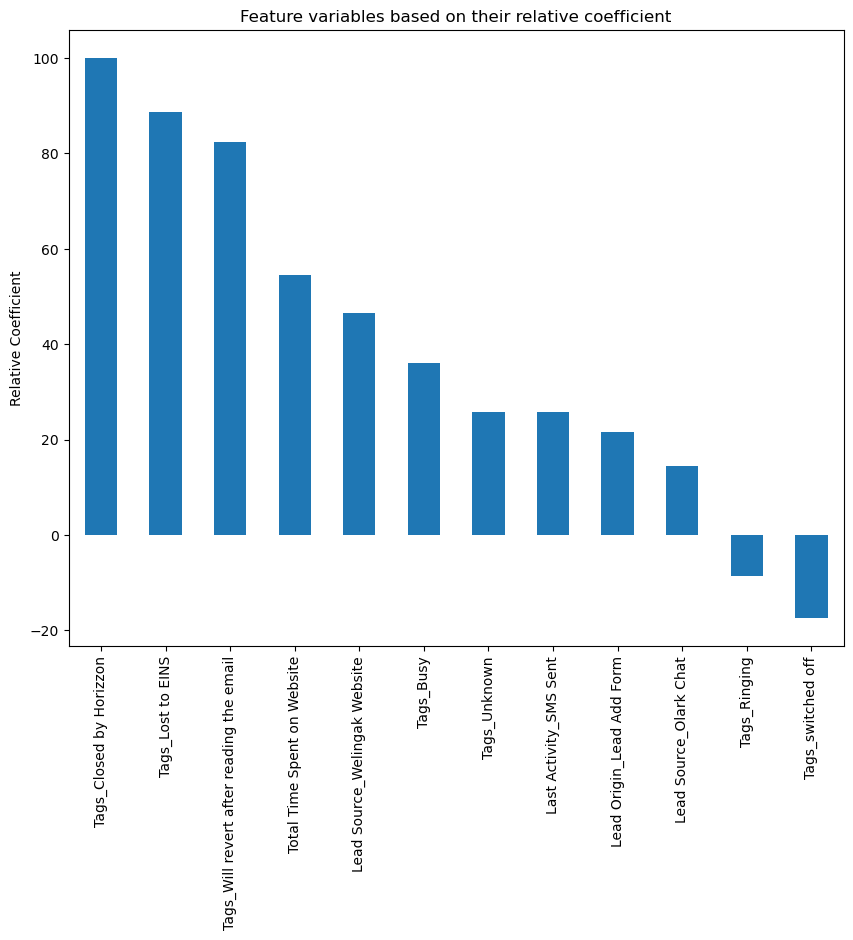

In [1740]:
# Plot showing the feature variables based on their relative coefficient values

plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [1742]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
6,Tags_Closed by Horizzon,100.00
7,Tags_Lost to EINS,88.74
10,Tags_Will revert after reading the email,82.29


# Conclusion

### We decided the final model (`Model 5`) with the following characteristics:

- The model selected features have their respective p-value < `0.05`.
- The model selected features have very low VIF scores. This implies that there is almost **no muliticollinearity** among the selected features. 
- At the optimal probability cut-off value of `0.3`, the overall accuracy of the model on the test and the train dataset is `0.907` and `0.909` respectively.


### The top features that contribute the most in predicting the Lead Score

- Tags_Closed by Horizzon
- Tags_Lost to EINS	
- Tags_Will revert after reading the email	

### The feature that are inversely proportional to predicting a lead score. This means that with a decrease in the values of these features, the probability of the Lead Score increases. These are the features with negative coefficient value.

- Tags_switched off
- Tags_Ringing